# Introduction

The Project is to build a model to improve the Zestimate residual error. 

logerror=log(Zestimate)−log(SalePrice) 

“Zestimates” are Zillow's estimated home values. The model is to predict the difference between the Zillow's estimated home value, Zestimate, and the actual sale price. 

## Data

properties_2016.csv: a full list of real estate properties in three counties (Los Angeles, Orange and Ventura, California) data in 2016.

train_2016.csv: all the transactions before October 15, 2016, plus some of the transactions after October 15, 2016. It contains parcel ID ,  transaction date and calculated log error . 

properties_2017.csv: a full list of real estate properties in three counties (Los Angeles, Orange and Ventura, California) data in 2017.

train_2017.csv: all the transactions from Jan 1, 2017 to Sep 25, 2017. It can be used as a test dataset.



In [1]:
#import a necessary module

import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

# read files

path_properties_2016 ='/Users/kimjisun/Documents/SpringBoard/Project 1/zillow/properties_2016.csv'
df_properties_2016 = pd.read_csv(path_properties_2016, low_memory=False)

path_train_2016 ='/Users/kimjisun/Documents/SpringBoard/Project 1/zillow/train_2016.csv'
df_train_2016 = pd.read_csv(path_train_2016 , parse_dates=["transactiondate"], low_memory=False)

path_properties_2017 ='/Users/kimjisun/Documents/SpringBoard/Project 1/zillow/properties_2017.csv'
df_properties_2017 = pd.read_csv(path_properties_2017, low_memory=False)

path_train_2017 ='/Users/kimjisun/Documents/SpringBoard/Project 1/zillow/train_2017.csv'
df_train_2017 = pd.read_csv(path_train_2017 , parse_dates=["transactiondate"],low_memory=False)

In [2]:
# merge training and properties data for 2016 and 2017

df_train_2016 = pd.merge(df_train_2016, df_properties_2016, how='inner', on='parcelid')
df_test_2017 = pd.merge(df_train_2017, df_properties_2017, how='inner', on='parcelid')

In [3]:
df_train_2016.shape

(90275, 60)

In [5]:
df_test_2017.shape

(77613, 60)

# Data Wrangling

## Data Cleaning

I explored training data. 125 duplicated parcelid for 2016 data and 199 duplicated parcelid for 2017 data were found. However, it meant they were trasacted for more than twice for a year. so it didn't have any problem.

In [6]:
df_train_2016.shape
sum(df_train_2016.duplicated('parcelid'))

125

In [7]:
df_test_2017.shape
sum(df_train_2017.duplicated('parcelid'))

199

## Missing Values

Let's check how many missing value each column has. 

We can find that 47 columns have missing values and 18 columns among them have more than 95% of missing values. 


In [42]:
df_2016_missing = df_train_2016.isnull().sum(axis=0).reset_index()
df_2016_missing.columns = ["index",'missing_values']


df_2016_missing = df_2016_missing[df_2016_missing.missing_values != 0]
df_2016_missing['ratio'] =df_2016_missing['missing_values']/len(df_train_2016)

missing_values = df_2016_missing.sort_values(by='ratio', ascending=False )
missing_values

,index,missing_values,ratio
8,buildingclasstypeid,90259,0.999823
15,finishedsquarefeet13,90242,0.999634
5,basementsqft,90232,0.999524
43,storytypeid,90232,0.999524
48,yardbuildingsqft26,90180,0.998948
51,fireplaceflag,90053,0.997541
4,architecturalstyletypeid,90014,0.997109
45,typeconstructiontypeid,89976,0.996688
18,finishedsquarefeet6,89854,0.995336
11,decktypeid,89617,0.992711


In [43]:
len(missing_values[missing_values['ratio']>0.95])

18

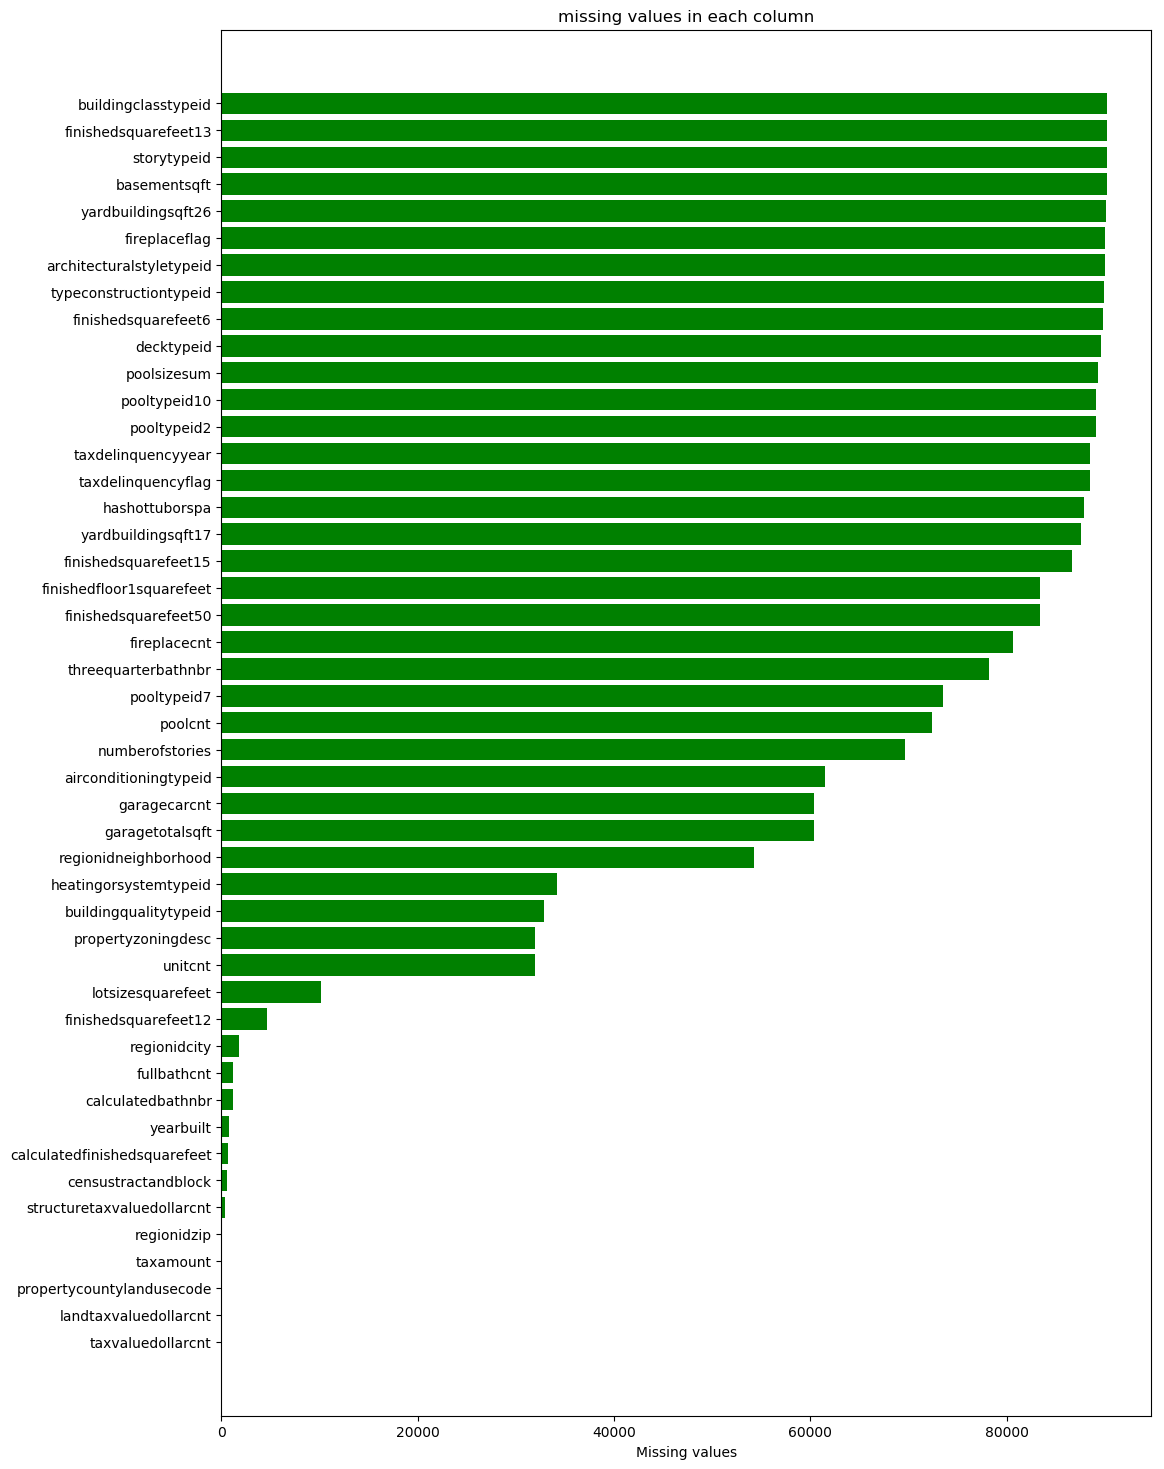

In [32]:
# Draw horizontal Bar plot for missing values

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(12,18))

y_pos = np.arange(len(missing_values))


ax.barh(y_pos, missing_values['missing_values'],   color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(missing_values['index'].values)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Missing values')
ax.set_title('missing values in each column')

plt.show()





## Outliers

Let's draw a scatter plot on "logerror", then we can find that there are some outliers at the end of both sides. 

Our task in the project is to find where the zillow algorithm fails. These outliers means where the zillow algorithm fails the most. Thus, I will leave outliers just like that. 


In [ ]:
plt.scatter(range(df_train_2016.shape[0]), df_train_2016.sort_values(by='logerror')['logerror'])